In [1]:
import numpy as np
import pandas as pd

In [2]:


# 创建一个包含你的数据的DataFrame
df = pd.read_csv('../Data/NOAA/All Station/Burlington Station.csv')


# 将日期和时间合并为一个列，并将其设置为DataFrame的索引
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (GMT)'])
df.set_index('DateTime', inplace=True)

# 将数据分割为训练集和测试集
train_months = [1, 2, 4, 5, 7, 8, 10, 11]
test_months = [3, 6, 9, 12]

train_data = df[df.index.month.isin(train_months)]
test_data = df[df.index.month.isin(test_months)]
#
# # 打印训练集和测试集
# print("训练集:")
# print(train_data)
# print("\n测试集:")
# print(test_data)


训练集:
                         Date Time (GMT)  Wind Speed (m/s)  Wind Dir (deg)  \
DateTime                                                                     
2022-01-01 00:00:00  2022/1/1       0:00               0.9             192   
2022-01-01 01:00:00  2022/1/1       1:00               1.0             223   
2022-01-01 02:00:00  2022/1/1       2:00               1.4             169   
2022-01-01 03:00:00  2022/1/1       3:00               1.3             185   
2022-01-01 04:00:00  2022/1/1       4:00               1.7             186   
...                       ...        ...               ...             ...   
2023-01-01 19:00:00  2023/1/1      19:00               4.1             269   
2023-01-01 20:00:00  2023/1/1      20:00               5.5             262   
2023-01-01 21:00:00  2023/1/1      21:00               2.9             295   
2023-01-01 22:00:00  2023/1/1      22:00               1.9             249   
2023-01-01 23:00:00  2023/1/1      23:00               1.0 

In [4]:
# test_data

,Date,Time (GMT),Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Air Temp (°C),Baro (mb),Water Level(m)
DateTime,,,,,,,,
2022-03-01 00:00:00,2022/3/1,0:00,0.6,79,0.8,1.6,1026.1,1.958
2022-03-01 01:00:00,2022/3/1,1:00,1.2,75,1.5,1.2,1025.7,2.238
2022-03-01 02:00:00,2022/3/1,2:00,1.2,142,1.8,0.1,1025.6,2.161
2022-03-01 03:00:00,2022/3/1,3:00,1.7,111,2.3,-0.5,1025.4,1.794
2022-03-01 04:00:00,2022/3/1,4:00,0.8,157,1.2,-0.8,1025.9,1.364
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022/12/31,19:00,0.5,70,0.8,9.5,1012.8,1.426
2022-12-31 20:00:00,2022/12/31,20:00,0.1,356,0.6,9.3,1012.1,1.960
2022-12-31 21:00:00,2022/12/31,21:00,0.1,253,0.7,8.7,1011.6,2.280


In [3]:
# train_data

,Date,Time (GMT),Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Air Temp (°C),Baro (mb),Water Level(m)
DateTime,,,,,,,,
2022-01-01 00:00:00,2022/1/1,0:00,0.9,192,1.8,10.3,1014.2,2.411
2022-01-01 01:00:00,2022/1/1,1:00,1.0,223,1.6,10.3,1014.3,2.436
2022-01-01 02:00:00,2022/1/1,2:00,1.4,169,2.0,10.2,1013.4,2.104
2022-01-01 03:00:00,2022/1/1,3:00,1.3,185,1.8,9.7,1013.2,1.677
2022-01-01 04:00:00,2022/1/1,4:00,1.7,186,2.4,9.8,1013.0,1.255
...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,2023/1/1,19:00,4.1,269,5.8,11.0,1014.3,0.644
2023-01-01 20:00:00,2023/1/1,20:00,5.5,262,5.9,10.3,1014.4,1.150
2023-01-01 21:00:00,2023/1/1,21:00,2.9,295,3.8,12.2,1014.6,1.749


In [2]:
df = pd.read_csv('../Data/NOAA/All Station/Burlington Station.csv')

In [3]:
df.head()

,Date,Time (GMT),Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Air Temp (°C),Baro (mb),Water Level(m)
0,2022/1/1,0:00,0.9,192,1.8,10.3,1014.2,2.411
1,2022/1/1,1:00,1.0,223,1.6,10.3,1014.3,2.436
2,2022/1/1,2:00,1.4,169,2.0,10.2,1013.4,2.104
3,2022/1/1,3:00,1.3,185,1.8,9.7,1013.2,1.677
4,2022/1/1,4:00,1.7,186,2.4,9.8,1013.0,1.255


In [4]:
df = df[['Wind Speed (m/s)', 'Wind Dir (deg)','Wind Gust (m/s)', 'Air Temp (°C)', 'Baro (mb)', 'Water Level(m)']]

In [5]:
df

,Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Air Temp (°C),Baro (mb),Water Level(m)
0,0.9,192,1.8,10.3,1014.2,2.411
1,1.0,223,1.6,10.3,1014.3,2.436
2,1.4,169,2.0,10.2,1013.4,2.104
3,1.3,185,1.8,9.7,1013.2,1.677
4,1.7,186,2.4,9.8,1013.0,1.255
...,...,...,...,...,...,...
8772,4.1,269,5.8,11.0,1014.3,0.644
8773,5.5,262,5.9,10.3,1014.4,1.150
8774,2.9,295,3.8,12.2,1014.6,1.749
8775,1.9,249,2.1,10.5,1014.8,2.114


### 数据归一化

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(df)

In [7]:
dataset

array([[0.06870229, 0.53333333, 0.08450704, 0.48966942, 0.52517986,
        0.77614253],
       [0.07633588, 0.61944444, 0.07511737, 0.48966942, 0.52697842,
        0.78259747],
       [0.10687023, 0.46944444, 0.09389671, 0.48760331, 0.51079137,
        0.69687581],
       ...,
       [0.22137405, 0.81944444, 0.17840376, 0.52892562, 0.5323741 ,
        0.6052156 ],
       [0.14503817, 0.69166667, 0.09859155, 0.49380165, 0.53597122,
        0.69945778],
       [0.07633588, 0.77222222, 0.07981221, 0.43181818, 0.55755396,
        0.73483088]])

In [8]:
def splitData(var,per_test):
    num_test=int(len(var)*per_test)
    train_size=int(len(var)-num_test)
    train_data=var[0:train_size]
    test_data=var[train_size:train_size+num_test]
    return train_data,test_data

In [9]:
train,test = splitData(dataset,0.2)

In [10]:
print('train_len:',len(train),'test_len:',len(test))

train_len: 7022 test_len: 1755


In [12]:
def createXY(data,n_past):
    dataX = []
    dataY = []
    for i in range(n_past,len(data)):
        dataX.append(data[i-n_past:i,0:data.shape[1]])
        dataY.append(data[i,5])
    return np.array(dataX),np.array(dataY)

In [13]:
# dataX = [[1,2],
#          [2,3],
#          [2,4]]
# dataX = np.array(dataX)
# dataX


In [14]:
n_past = 1
trainX,trainY = createXY(train,n_past)
testX,testY = createXY(test,n_past)

In [15]:
print('train Shape---',trainX.shape)
print('trainY Shape---',trainY.shape)

train Shape--- (7021, 1, 6)
trainY Shape--- (7021,)


In [16]:
print('testX Shape---',testX.shape)
print('testY Shape---',testY.shape)

testX Shape--- (1754, 1, 6)
testY Shape--- (1754,)


In [17]:
trainX.shape[1]

1

In [18]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1]*trainX.shape[2]))

trainX.shape

(7021, 6)

In [19]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[1]*testX.shape[2]))

testX.shape

(1754, 6)

### XGBoost

In [31]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', n_estimators=50)
model = xgb.fit(trainX,trainY)

In [32]:
pre = model.predict(testX)

In [33]:
import math
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score as r2, mean_squared_error
### 预测300个小时
def data_ana_pre(pre,normal_num):
    pre = np.array(pre).reshape(-1, 1)

    prediction_copies_array = np.repeat(pre, trainX.shape[1], axis=-1)  #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将

    pre = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(pre), trainX.shape[1])))[:, normal_num]  #进行逆变换但是，只需要最后一列


    test_data = np.array(testY[-300:]).reshape(-1, 1)

    prediction_copies_test_data = np.repeat(test_data, trainX.shape[1],axis=-1)  #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将
    prediction_copies_test_data
    test_data = scaler.inverse_transform(np.reshape(prediction_copies_test_data, (len(test_data), trainX.shape[1])))[:,normal_num]  #进行逆变换但是，只需要最后一列

    from sklearn.metrics import r2_score as r2

    y = np.array(test_data)
    y_pred = pre[-300:]
    MSE = mean_squared_error(y, y_pred)
    RMSE = math.sqrt(MSE)
    # MAE=mean_absolute_error(y, pre)
    # MAPE = metrics.mean_absolute_percentage_error(y, pre)
    MAE = np.mean(np.abs(y - y_pred))
    MAPE = np.mean(np.abs((y - y_pred) / y))
    print("rmse :", RMSE)
    print("mae :", MAE)
    print("mape :", MAPE)
    print('R² :', r2(y, y_pred))
    plt.plot(y, color='red', label='Real Value')
    plt.plot(y_pred, color='blue', label='Pred Value')
    plt.title('Prediction Water Level')
    plt.xlabel('Time')
    plt.ylabel('Detail Value')
    plt.legend()
    plt.show()

rmse : 0.4124138285904105
mae : 0.3592378735146299
mape : 1.0849124633098115
R² : 0.7379707961044422


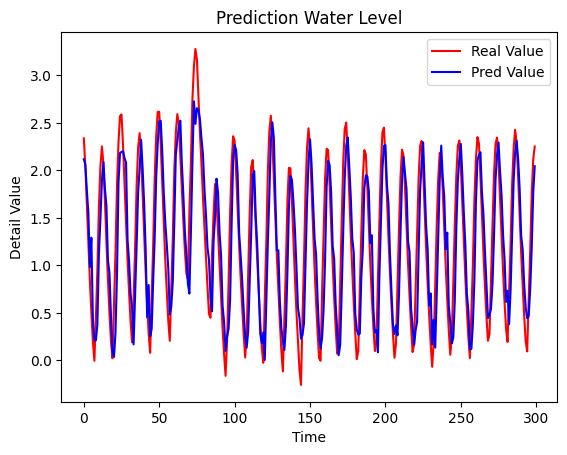

In [34]:
data_ana_pre(pre,5)

In [22]:
pre

array([0.48259288, 0.50163054, 0.67859155, ..., 0.4225989 , 0.5800277 ,
       0.68465024], dtype=float32)

In [23]:
pre = np.array(pre).reshape(-1,1)

In [196]:
prediction_copies_array = np.repeat(pre,trainX.shape[1],axis = -1) #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将

In [197]:
prediction_copies_array

array([[0.19947043, 0.19947043, 0.19947043, ..., 0.19947043, 0.19947043,
        0.19947043],
       [0.467084  , 0.467084  , 0.467084  , ..., 0.467084  , 0.467084  ,
        0.467084  ],
       [0.5176493 , 0.5176493 , 0.5176493 , ..., 0.5176493 , 0.5176493 ,
        0.5176493 ],
       ...,
       [0.28061563, 0.28061563, 0.28061563, ..., 0.28061563, 0.28061563,
        0.28061563],
       [0.21145213, 0.21145213, 0.21145213, ..., 0.21145213, 0.21145213,
        0.21145213],
       [0.09187546, 0.09187546, 0.09187546, ..., 0.09187546, 0.09187546,
        0.09187546]], dtype=float32)

In [198]:
pre = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(pre),trainX.shape[1])))[:,0] #进行逆变换但是，只需要最后一列

In [199]:
pre

array([22.910872, 50.52582 , 55.743637, ..., 31.284216, 24.147259,
       11.808184], dtype=float32)

In [200]:
# plot_importance(model)
# plt.show()
# print(pre[0:200])
# print(len(test))
# y_true = test[1:4784]

In [201]:
datasets = pd.read_csv('../Data/OriginData/AU-ASM.csv')
y = datasets['SW_IN_F'][-2392:-2092]

In [202]:
y

39148    86.206897
39149    81.293103
39150    75.344828
39151    67.327586
39152    58.017241
           ...    
39443    25.344828
39444    14.310345
39445     4.913793
39446     9.621552
39447    19.233103
Name: SW_IN_F, Length: 300, dtype: float64

In [203]:
y_pred = pre[-2392:-2092]

In [204]:
import math
from sklearn.metrics import r2_score as r2, mean_squared_error

y=np.array(y)
MSE = mean_squared_error(y, y_pred)
RMSE = math.sqrt(MSE)
# MAE=mean_absolute_error(y, pre)
# MAPE = metrics.mean_absolute_percentage_error(y, pre)
MAE = np.mean(np.abs(y-y_pred))
MAPE = np.mean(np.abs((y - y_pred) / y))
print("rmse :",RMSE)
print("mae :", MAE)
print("mape :", MAPE)
print('R² :',r2(y,y_pred))

rmse : 6.110954318614303
mae : 3.4474167848144663
mape : 0.09391027794200545
R² : 0.9531377513345016


In [205]:
# y_true = pd.DataFrame(y)
# y_true.to_csv('../LSTM/LSTM_Result_Collection_SW_TA_LW_VPD_PA_WS_RH/PredictionResult/SW_TA_LW_VPD_PA_WS_RH/'+'SW_XGBYTrue'+'.csv',index=False)
# y_pre = pd.DataFrame(y_pred)
# y_pre.to_csv('../LSTM/LSTM_Result_Collection_SW_TA_LW_VPD_PA_WS_RH/PredictionResult/SW_TA_LW_VPD_PA_WS_RH/'+'SW_XGBYTPre'+'.csv',index=False)

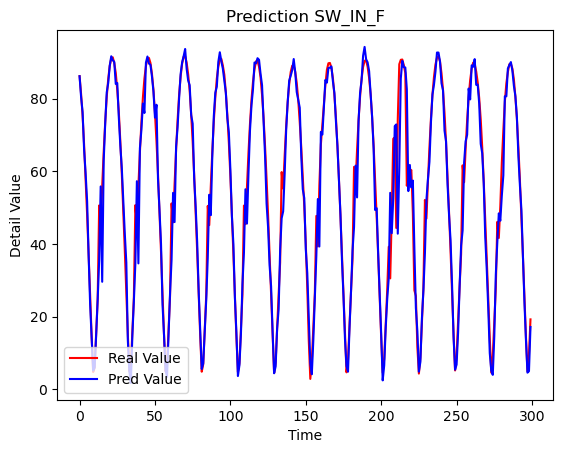

In [206]:
from matplotlib import pyplot as plt

plt.plot(y[0:300],color = 'red',label = 'Real Value')
plt.plot(pre[-2392:-2092],color = 'blue',label = 'Pred Value')
plt.title('Prediction SW_IN_F')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
plt.show()